# Exploratory Data Analysis on Alzaheimers Disease Detection Dataset 

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

# unzip
!unzip '/content/drive/MyDrive/CEP_DATA/archive.zip'

In [ ]:
data_path = '/content/Alzheimer_s Dataset'

total_data = {"Mild Demented":[], "Moderate Demented":[], "Non Demented":[], "Very Mild Demented":[]}

for dir in os.listdir(os.path.join(data_path, 'train')):
  for img in os.listdir(data_path+'/train/'+dir):
    if dir == 'MildDemented':
      total_data['Mild Demented'].append(img)
    elif dir == 'ModerateDemented':
      total_data['Moderate Demented'].append(img)
    elif dir == 'NonDemented':
      total_data['Non Demented'].append(img)
    elif dir == 'VeryMildDemented':
      total_data['Very Mild Demented'].append(img)

<BarContainer object of 4 artists>

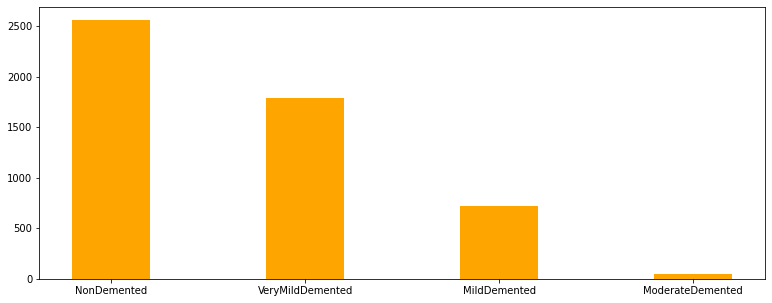

In [ ]:
data_path = '/content/Alzheimer_s Dataset'

data = {'NonDemented':      0, 
        'VeryMildDemented': 0, 
        'MildDemented':     0,
        'ModerateDemented': 0}
        
train_path = data_path+'/train'

for cls in os.listdir(train_path):
    for img in os.listdir(train_path + '/' + cls):
        data[cls] = data[cls] + 1

keys = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (13, 5))
 
plt.bar(keys, values, color='orange', width = 0.4,)

<BarContainer object of 4 artists>

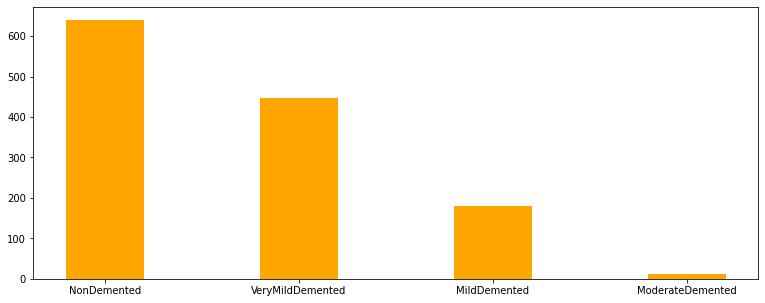

In [ ]:
data_path = '/content/Alzheimer_s Dataset'

data = {'NonDemented':      0, 
        'VeryMildDemented': 0, 
        'MildDemented':     0,
        'ModerateDemented': 0}
train_path = data_path+'/test'

for cls in os.listdir(train_path):
    for img in os.listdir(train_path + '/' + cls):
        data[cls] = data[cls] + 1

keys = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (13, 5))
 
plt.bar(keys, values, color='orange', width = 0.4,)

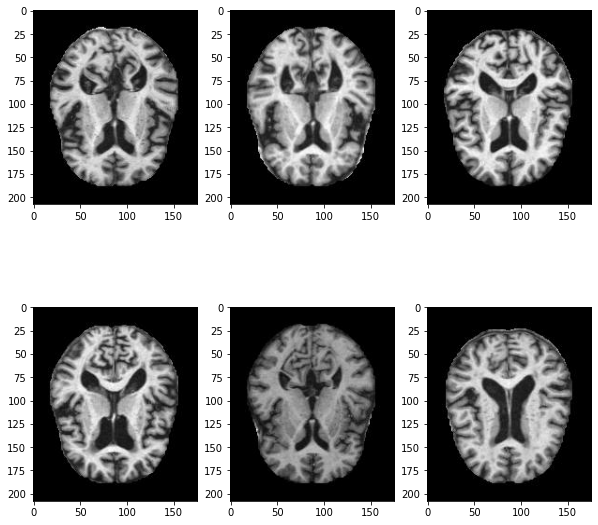

In [ ]:
# How the images look like?
f, axarr = plt.subplots(2,3,figsize=(10, 10))
axarr[0,0].imshow(cv2.imread(data_path+'/train/MildDemented/'+total_data['Mild Demented'][1]))
axarr[0,1].imshow(cv2.imread(data_path+'/train/MildDemented/'+total_data['Mild Demented'][2]))
axarr[0,2].imshow(cv2.imread(data_path+'/train/MildDemented/'+total_data['Mild Demented'][5]))
axarr[1,0].imshow(cv2.imread(data_path+'/train/MildDemented/'+total_data['Mild Demented'][3]))
axarr[1,1].imshow(cv2.imread(data_path+'/train/MildDemented/'+total_data['Mild Demented'][4]))
axarr[1,2].imshow(cv2.imread(data_path+'/train/MildDemented/'+total_data['Mild Demented'][6]))

In [ ]:
# making n X m matrix
from tensorflow.keras.preprocessing import image

def img2np(path, list_of_filename, size = (64, 64)):
    # iterating through each file
    for fn in list_of_filename:
        fp = path + fn
        current_image = image.load_img(fp, target_size = size, 
                                       color_mode = 'grayscale')
        # covert image to a matrix
        img_ts = image.img_to_array(current_image)
        # turn that into a vector / 1D array
        img_ts = [img_ts.ravel()]
        try:
            # concatenate different images
            full_mat = np.concatenate((full_mat, img_ts))
        except UnboundLocalError: 
            # if not assigned yet, assign one
            full_mat = img_ts
    return full_mat

train_dir = data_path+'/train/'

mild_demented = img2np(f'{train_dir}/MildDemented/', total_data['Mild Demented'])
moderate_demented = img2np(f'{train_dir}/ModerateDemented/', total_data['Moderate Demented'])
non_demented = img2np(f'{train_dir}/NonDemented/', total_data['Non Demented'])
very_mild_demented = img2np(f'{train_dir}/VeryMildDemented/', total_data['Very Mild Demented'])

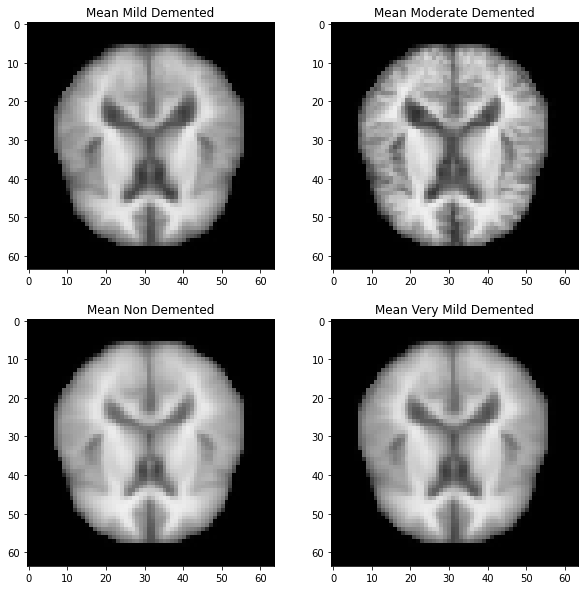

In [ ]:
from google.colab.patches import cv2_imshow
def find_mean_img(full_mat, title, size = (64, 64)):
    # calculate the average
    mean_img = np.mean(full_mat, axis=0)
    # reshape it back to a matrix
    mean_img = mean_img.reshape(size)
    return mean_img

norm_mean1 = find_mean_img(mild_demented, 'Mild Demented')
norm_mean2 = find_mean_img(moderate_demented, 'Moderate Demented')
norm_mean3 = find_mean_img(non_demented, 'Non Demented')
norm_mean4 = find_mean_img(very_mild_demented, 'Very Mild Demented')

f, axarr = plt.subplots(2,2,figsize=(10, 10))
axarr[0,0].title.set_text('Mean Mild Demented')
axarr[0,0].imshow(norm_mean1,vmin=0, vmax=255, cmap='Greys_r')
axarr[0,1].title.set_text('Mean Moderate Demented')
axarr[0,1].imshow(norm_mean2,vmin=0, vmax=255, cmap='Greys_r')
axarr[1,0].title.set_text('Mean Non Demented')
axarr[1,0].imshow(norm_mean3,vmin=0, vmax=255, cmap='Greys_r')
axarr[1,1].title.set_text('Mean Very Mild Demented')
axarr[1,1].imshow(norm_mean4,vmin=0, vmax=255, cmap='Greys_r')


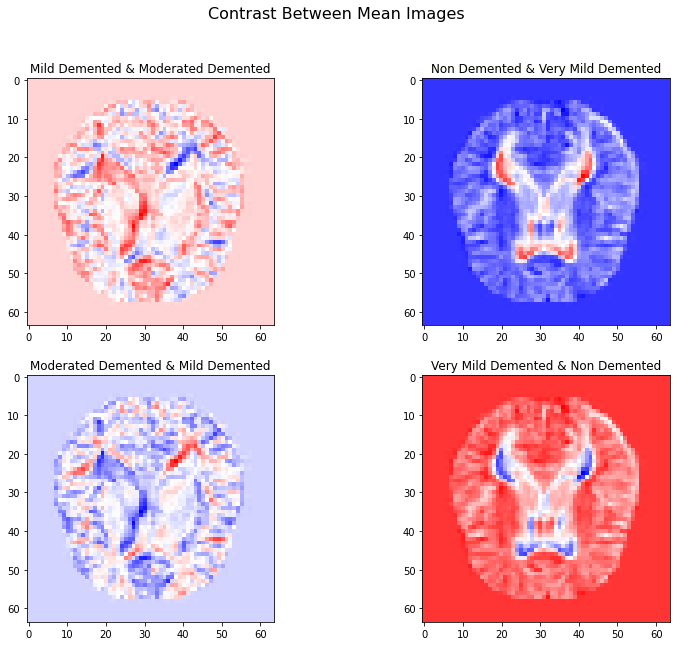

In [ ]:
contrast_mean1 = norm_mean1 - norm_mean2
contrast_mean2 = norm_mean3 - norm_mean4
contrast_mean3 = norm_mean2 - norm_mean1
contrast_mean4 = norm_mean4 - norm_mean3

f, axarr = plt.subplots(2,2,figsize=(13, 10))
f.suptitle("Contrast Between Mean Images", fontsize=16)
axarr[0,0].title.set_text('Mild Demented & Moderated Demented')
axarr[0,0].imshow(contrast_mean1, cmap='bwr')
axarr[0,1].title.set_text('Non Demented & Very Mild Demented')
axarr[0,1].imshow(contrast_mean2, cmap='bwr')
axarr[1,0].title.set_text('Moderated Demented & Mild Demented')
axarr[1,0].imshow(contrast_mean3, cmap='bwr')
axarr[1,1].title.set_text('Very Mild Demented & Non Demented')
axarr[1,1].imshow(contrast_mean4, cmap='bwr')


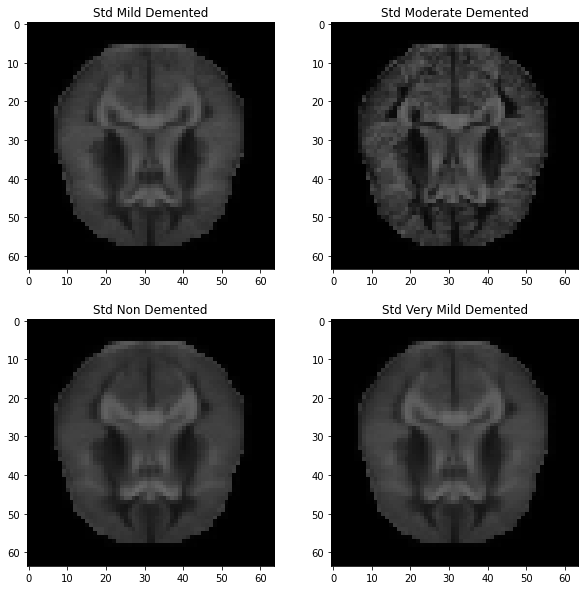

In [ ]:
from google.colab.patches import cv2_imshow
def find_std_img(full_mat, title, size = (64, 64)):
    # calculate the average
    std_img = np.std(full_mat, axis=0)
    # reshape it back to a matrix
    std_img = std_img.reshape(size)
    return std_img

norm_mean1 = find_std_img(mild_demented, 'Mild Demented')
norm_mean2 = find_std_img(moderate_demented, 'Moderate Demented')
norm_mean3 = find_std_img(non_demented, 'Non Demented')
norm_mean4 = find_std_img(very_mild_demented, 'Very Mild Demented')

f, axarr = plt.subplots(2,2,figsize=(10, 10))
axarr[0,0].title.set_text('Std Mild Demented')
axarr[0,0].imshow(norm_mean1,vmin=0, vmax=255, cmap='Greys_r')
axarr[0,1].title.set_text('Std Moderate Demented')
axarr[0,1].imshow(norm_mean2,vmin=0, vmax=255, cmap='Greys_r')
axarr[1,0].title.set_text('Std Non Demented')
axarr[1,0].imshow(norm_mean3,vmin=0, vmax=255, cmap='Greys_r')
axarr[1,1].title.set_text('Std Very Mild Demented')
axarr[1,1].imshow(norm_mean4,vmin=0, vmax=255, cmap='Greys_r')

In [ ]:

def get_dims(file):
  '''Returns dimenstions for an RBG image'''
  img = cv2.imread(file)
  h,w,c = img.shape
  return h,w

train_dir = data_path+'/train/'

directories = {'Non Demented': train_dir+'NonDemented/',
               'Mild Demented': train_dir+'MildDemented/',
               'Moderate Demented': train_dir+'ModerateDemented/',
               'Very Mild Demented': train_dir+'VeryMildDemented/'}

images_dic = {'height':[], 'width':[]}

for n,d in directories.items():
  filepath = d
  filelist = [filepath + f for f in os.listdir(filepath)]
  for img_path in filelist:
    h,w = get_dims(img_path)
    images_dic['height'].append(h)
    images_dic['width'].append(w)


      height  width
0        208    176
1        208    176
2        208    176
3        208    176
4        208    176
...      ...    ...
1274     208    176
1275     208    176
1276     208    176
1277     208    176
1278     208    176

[1279 rows x 2 columns]


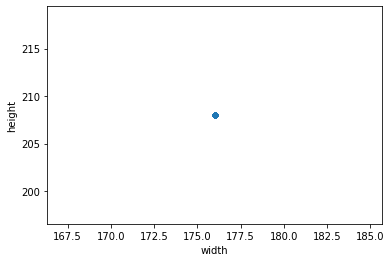

In [ ]:
df = pd.DataFrame.from_dict(images_dic)
print(df)
df.plot.scatter(x='width', y='height')